# Gradient Descent

Gradient descent essentialy just expressed this process in maths allowing us to find the mimimum for a function. Given a function and it's parameters, gradient descent iteratively updates the parameters values until we mimimize the function. By using calculus we can take the partial devrivative, with respect to a parameter, this tells us how the function changes with respect to that parameter. Lets apply this to linear regression.

The equation for linear regression is.

$$ y = mx + b $$

Given the two parameters $m$ and $b$, we could write a error function that looks like.

$$ error(m,b) = \frac{1}{N} \sum_{i}^{N} ( y_i -(mx_i + b))^2 $$

By taking the partial derivatives we can calculate how much both $ m $ and $ b $ contribute towards the error.

$$ \frac{\partial }{\partial m}error(m,b) = \frac{2}{N} \sum_{i=1}^{N} - x_i(y_i -(m x_i + b)) $$

$$ \frac{\partial }{\partial b}error(m,b) = \frac{2}{N} \sum_{i=1}^{N} -(y_i -(m x_i + b)) $$

Let express these functions in code and use them to solve linear regression the gradient descent way.

b: 0.9202696135546717
m: 0.10502451738435341


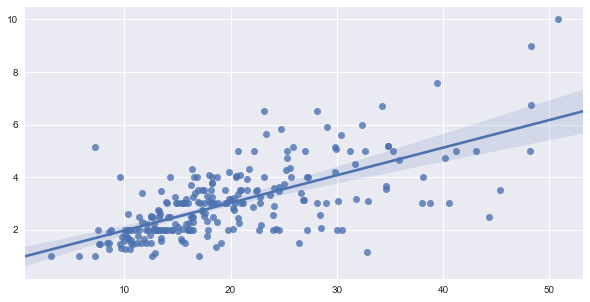

In [12]:
#For data
import pandas as pd
#Math libraries
import numpy as np
from scipy import stats
#Plotting
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})


tips = sns.load_dataset('tips')
x = np.array(tips["total_bill"])
y = np.array(tips["tip"])

reg_plot = sns.regplot(x,y)

x_line =  reg_plot.get_lines()[0].get_xdata()
y_line =  reg_plot.get_lines()[0].get_ydata()
results = stats.linregress(x_line,y_line)

print("b: {}".format(results.intercept))
print("m: {}".format(results.slope))

In [7]:
def cost_function(y,x,m,b):
    return np.mean((y - prediction(x,m,b))**2)

In [3]:
def prediction(x, m, b):
    return x*m + b

In [4]:
def grad_m(y, x, m, b):
    y_pred = prediction(x,m,b)
    return 2 * np.mean(-x * (y-y_pred))

In [5]:
def grad_b(y, x, m, b):
    y_pred = prediction(x,m,b)
    return 2 * np.mean(-(y-y_pred))

In [8]:
def update_weight(x,y,m,b, learning_rate = 0.001):
    m_new = m - grad_m(y,x,m,b) * learning_rate
    b_new = b - grad_b(y,x,m,b) * learning_rate
    return [m_new, b_new]

In [17]:
m = 0
b = 0

epochs = 10000
error_tot = []
for i in range(epochs):
    m, b = update_weight(x,y,m,b)
    error = cost_function(y,x,m,b)
    error_tot.append(error)



print ('m: %s'% (m))
print ('b: %s'% (b))

m: 0.106373656163
b: 0.888205200203


Text(0,0.5,'Error Rate')

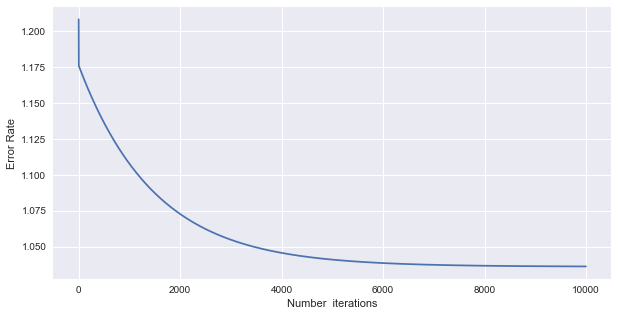

In [18]:
plt.plot(error_tot)
plt.xlabel("Number  iterations")
plt.ylabel("Error Rate")